# K-means clustering - Homework

In the tutorial, we have seen how to choose the number of clusters using the elbow method. However, we have also noticed that it does not always work very well. Let us study another method based on the prediction strength.

To know more about it, you can read the paper: Tibshirani, R. and Walther, G. (2005) Cluster validation by prediction strength. Journal of Computational and Graphical Statistics 14(3):511-528.

In this homework, we are going to  use the function KMeans from the SciKitLearn package. See here for the documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

## Prediction strength

Suppose we have a dataset of $X = \left\{ x_{i , j} \right\}$ of $n$ observations of $d$-dimensional variables. Let us divide these observations into a train set $X_{tr}$ and a test set $X_{te}$ of size $n_{tr}$ and $n_{te}$ respectively.

Let us choose the number of clusters $k$, and apply clustering to both the training data and the test data independently.

Let us now denote $A_{1} , A_{2} , \cdots , A_{k}$ the indices of the test observations in the test clusters $1 , 2 , \cdots , k$, and $n_{1} , n_{2} , \cdots , n_{k}$ the number of observations in these clusters.

We now consider the clusters obtained with the training data, and denote this classifying operation $C \left( X_{tr} \right)$. We now apply this classifying operation to the test set. 

Let us now denote $D_j \left[ C \left( X_{tr} , k \right) , X_{te} \right]$ the $n_{te}$ by $n_{te}$ matrix which $i i'$ element $D_j \left[ C \left( X_{tr} , k \right) , X_{te} \right] _{i i'}$ is equal to $1$ if observations $i$ and $i'$ from the $j$th cluster of the test set fall into the same training set cluster, and $0$ otherwise. The prediction strength is then defined by:

$ps \left( k \right) = \min_{ 1 \leq j \leq k} \frac{1}{n_{j} \left( n_{j } - 1 \right)} \sum_{i \neq i' \in A_{j}} D_j \left[ C \left( X_{tr} , k \right) , X_{te} \right] _{i i'}$ (**eq 1**)

## Data gathering and cleaning

Import useful Python packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from math import cos, sin, pi, sqrt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Set seed for reproducibility

In [3]:
random.seed(0)

Import data from the PNSN earthquake catalog.

In [4]:
catalog = pd.read_csv('pnsn_catalog.csv')
catalog.drop(columns=['Evid', 'Magnitude', 'Magnitude Type', 'Epoch(UTC)', 'Time UTC', 'Time Local', 'Distance From', 'Depth Mi'], inplace=True)
catalog.columns = ['latitude', 'longitude', 'depth']

Apply PCA and normalization.

In [5]:
data = catalog.to_numpy()
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
scaler = preprocessing.StandardScaler().fit(data_pca)
data_scaled = scaler.transform(data_pca)

## Homework

### Question 1 (1 point)

Write code to divide the data into a training set and a test set of approximately the same size.

In [6]:
# I wasn't sure how to split the data using the link above. 
# I looked online on this website 'https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html'
# It shows how to split data into training and test sets using train_test_split
# The test size = 0.5 should allow for a 50-50 split between training and test

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.5, shuffle = True, stratify=None)

### Question 2 (2 points)

For now, we choose to have k = 2 clusters.

Write code to apply K-means clustering to the training set and the test set using the Kmeans function from ScikitLearn.

In [7]:
# I used a random_state = 0 based on the example from the sklearn module
k = 2
kmeans_train = KMeans(n_clusters=2, random_state=0).fit(data_train)
kmeans_test = KMeans(n_clusters=2, random_state=0).fit(data_test)

### Question 3 (2 points)

Get the clusters for the test set.

In [8]:
# I think you're asking us for the cluster center, I did it this way since I did not define a clusters variable like in the class example
kmeans_test.cluster_centers_

array([[  46.39963937, -121.9218378 ,    4.93053368],
       [  47.18366572, -122.64446332,   23.6768559 ]])

Plot the data from the test set with two different colors for the two clusters.

Text(0.5, 0.92, 'Clusters for PNSN catalog')

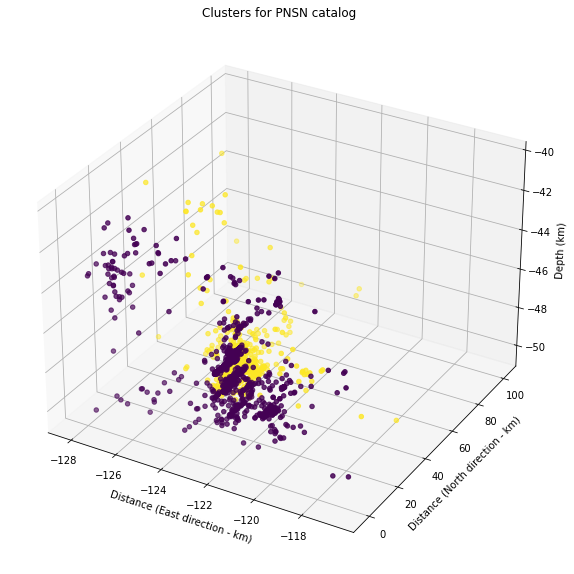

In [9]:
# I used the same axes titles as in the kmeans lecture tutorial
# when I tried to graph kmeans_test, I got an error, on the module it has a labels_ attribute so I used that
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_test[:, 1], data_test[:, 2], -data_test[:, 0], c=kmeans_test.labels_)
ax.set_xlabel('Distance (East direction - km)')
ax.set_ylabel('Distance (North direction - km)')
ax.set_zlabel('Depth (km)')
plt.title('Clusters for PNSN catalog')

### Question 4 (2 points)

Use the clustering and centroids from the training set to predict to which cluster the data points from the test set should belong.

In [10]:
data_test_predict = kmeans_train.predict(data_test)

Plot the data from the test set with two different colors for the two clusters.

Text(0.5, 0.92, 'Clusters for PNSN catalog')

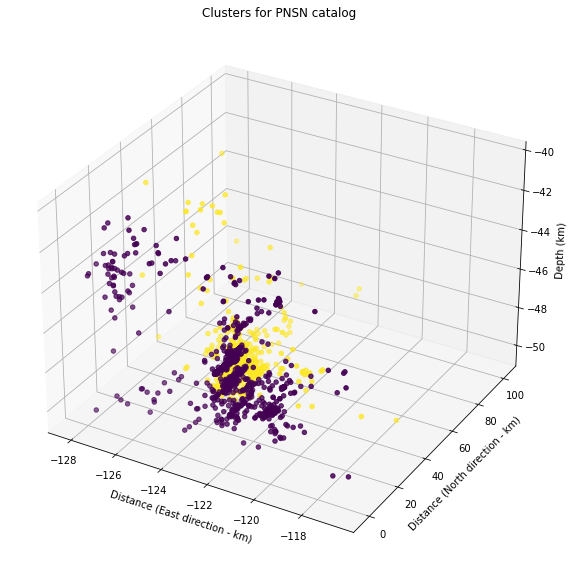

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_test[:, 1], data_test[:, 2], -data_test[:, 0], c=data_test_predict)
ax.set_xlabel('Distance (East direction - km)')
ax.set_ylabel('Distance (North direction - km)')
ax.set_zlabel('Depth (km)')
plt.title('Clusters for PNSN catalog')

### Question 5

Compute the prediction strength for $k$ = 2 as defined at the beginning. Hint: use **eq 1** with nested loops

In [12]:
# I need to find the number of pairs that the clusters share then divide by the total number of points then multiplied n(n-1)
# I think that the number of observations in this case refers to the number of clusters(?)
# This is because in the equation, the n values go up to k when describing what the values mean
k=2
prediction = np.zeros(k)
for cluster in np.arange(0,k):
    divide = 0
    pair = 0
    clusters = np.argwhere(kmeans_test.labels_)
    for i in clusters:
        for f in clusters:
            if i==f:
                continue
            divide = divide + 1
            if data_test_predict[i]==data_test_predict[f]:
                pair = pair + 1
        prediction[cluster] = (pair/divide)*(k*(k-1))




### Question 6

Write a function that does steps 1 to 5 for any number $k$ of clusters and return the prediction strength or a given $k$ number of clusters. 

In [13]:
def cluster_func(k,training,testing):
    pred_str = []

    kmeans_train = KMeans(n_clusters=2, random_state=0).fit(data_train)
    kmeans_test = KMeans(n_clusters=2, random_state=0).fit(data_test)
    data_test_predict = kmeans_train.predict(data_test)
    
    prediction = np.zeros(k)
    for cluster in np.arange(0,k):
        divide = 0
        pair = 0
        clusters = np.argwhere(kmeans_test.labels_)
        for i in clusters:
            for f in clusters:
                if i==f:
                    continue
                divide = divide + 1
                if data_test_predict[i]==data_test_predict[f]:
                    pair = pair + 1
        prediction[cluster] = (pair/divide)*(k*(k-1))
    
    pred_str.append(prediction)
    return pred_str

### Question 7

Apply this function to $k = 2, \cdots , 20$.

In [14]:
prediction_strength = []
for k in np.arange(2,21):
    prediction_strength.append(cluster_func(k,data_train,data_test))
    print(k)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


### Question 8

Plot the prediction strength as a function of number of clusters. What is the optimal number of clusters for this dataset?

/srv/conda/envs/notebook/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


AttributeError: 'Line2D' object has no property 'dtype'

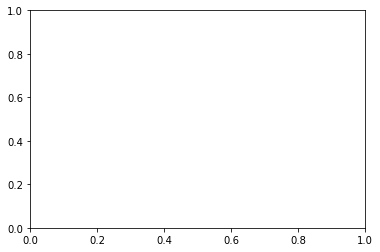

In [16]:
# I'm not sure what this error means
num_cluster = np.arange(2,21)
fig, ax = plt.subplots()
ax.plot(num_cluster, prediction_strength)
ax.set_xlabel('Clusters')
ax.set_ylabel('Prediction Strength')
ax.set_title('Optimal Number of Clusters')